# Libs

In [35]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import numpy as np

import os
import re
import sys

import seaborn as sns
 
from collections import defaultdict
    
sys.path.append("/home/charles/Projects/BarycentersAgePyramid/Python")
sys.path.append("/home/dhw3172/projects/barycenterAgePyramid/Python")

from WassAge import *

from pathlib import Path

# Params

In [36]:
DATA_PATH = Path("." ) / ".." /".."/ "Data" 
os.listdir(DATA_PATH)

['Numpy',
 'shpLavalDAAgePyramid',
 'shpMtlDAAgePyramid',
 'shpHalifaxDAAgePyramid',
 'QuebecNeighbourhoods',
 '.ipynb_checkpoints',
 'MontrealNeighbourhoods',
 'shpCalgaryDAAgePyramid',
 'shpMontrealDAAgePyramid',
 'shpTorontoDAAgePyramid',
 'Extremal',
 'shpQuebecDAAgePyramid',
 'shpWinnipegDAAgePyramid',
 'shpVancouverDAAgePyramid',
 'shpWaterlooDAAgePyramid']

In [37]:
np.random.seed(1)

In [38]:
useApproxWass= False
approxStr = "Approximate" if useApproxWass else "Exact"  

In [39]:
city="Montreal"
#city="Quebec City"

# Data IO

## DA shp

In [40]:
dfGeoClean = normalizeCleanDfGeo( readDAShp(city=city) )

Reading neibourhoods from Montreal


In [41]:
dfGeoClean[LIST_AGE_COLS].sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2786    1.0
2787    1.0
2788    1.0
2789    1.0
2790    1.0
Length: 2791, dtype: float64

In [42]:
dfGeoCleanAge = dfGeoClean[LIST_AGE_COLS]

## Neigh

In [43]:
dfNeigh = readNeighShp(city=city)

Reading neibourhoods from Montreal


## Get the youngest + oldest DAs

In [44]:
youngestDAIdx , _ = getYoungestDA(dfGeoClean)
oldestDAIdx , _ = getOldestDA(dfGeoClean)

## Plot the 2 DA extremums (oldest and youngest)

In [45]:
def getCol(i):
    if i == youngestDAIdx :
        c="red"
    elif i == oldestDAIdx:
        c="blue"
    else:
        c="grey"
        
    return c

cols=[ getCol(i) for i in range(dfGeoClean.shape[0]) ]


In [46]:
dfGeoClean["isYoungest"]=range(dfGeoClean.shape[0]) == youngestDAIdx 
dfGeoClean["isOldest"]=range(dfGeoClean.shape[0]) == oldestDAIdx 

In [47]:
print( np.where( dfGeoClean["isYoungest"] ), youngestDAIdx, 
np.where( dfGeoClean["isOldest"] ), oldestDAIdx )

(array([1086]),) 1086 (array([2167]),) 2167


## Plot the DAs and the neighbourhoods

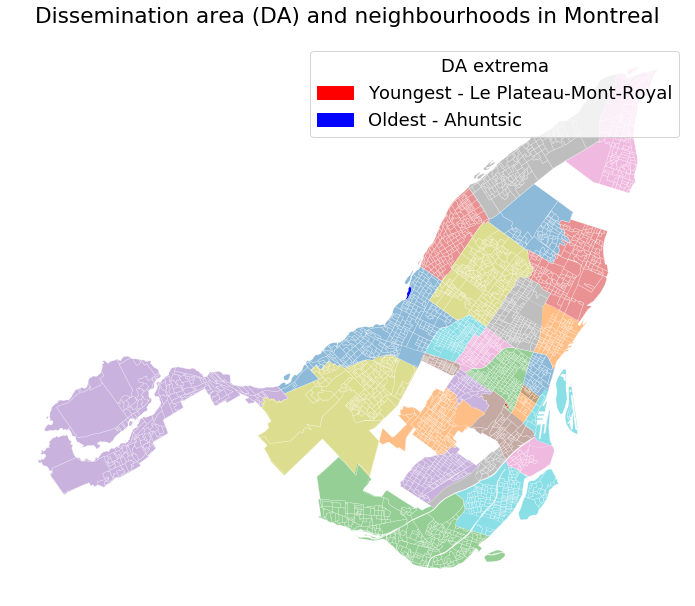

In [48]:

rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18, 'axes.titlesize': 20 }
sns.set_context(rc=rc)


f,ax=plt.subplots(figsize=(10,15))
_ = f.suptitle(f"Dissemination area (DA) and neighbourhoods in {city}")


youngNameNeigh=dfGeoClean.iloc[youngestDAIdx ]["NOM"]
oldNameneigh=dfGeoClean.iloc[oldestDAIdx]["NOM"]
strList=[f"Youngest - {youngNameNeigh}", 
         f"Oldest - {oldNameneigh}"]

rgbCols = [mcolors.to_rgba("red"),mcolors.to_rgba("blue")]
listLegendHandles=[]

for k,l in enumerate(strList):
    listLegendHandles.append(mpatches.Patch(color=rgbCols[k],  
                                            label=l))

ax.legend(title="DA extrema",
               handles=listLegendHandles,
               loc="best")


#Hackish way to plot everythin - the order matters  

## First the neighbourhoods with appropriate transparencey
dfNeigh.plot(column="NOM",  categorical=True, ax=ax, alpha=0.5)

## Next the DA boundaries in white + no fil
dfGeoClean.geometry.boundary.plot(color=None,edgecolor="white", linewidth=0.2, ax=ax)

## Next, both the oldest and youngest DAs
dfYoungest=dfGeoClean.copy()
dfYoungest.loc [ ~dfYoungest.isYoungest ] = np.nan
dfYoungest.plot( column="isYoungest", categorical=True, legend=True, color="red",linewidth=2, ax=ax)


dfOldest=dfGeoClean.copy()
dfOldest.loc [ ~dfOldest.isOldest ] = np.nan
dfOldest.plot( column="isOldest", categorical=True, legend=True, color="blue", linewidth=2, ax=ax)




plt.axis('off')

f.tight_layout(rect=[0, 0.03, 1, 1.35])

f.savefig( DATA_PATH /  ".."/ "Figures" / "Extremal" / f"spatialDAExtreme_{city}.png", bbox_inches="tight")